In [100]:
import scipy
import librosa
import numpy as np
import scipy.signal as signal
import os
from matplotlib import pyplot as plt
import random
import torch

In [101]:
maj_files_paths = None
min_files_paths = None

In [102]:
maj_files = os.path.join(os.getcwd(),'Data', 'major')
min_files = os.path.join(os.getcwd(),'Data', 'minor')

In [103]:
def f(n, octave):
    return 2 ** ((n-49)/12) * (55 * (2**octave))

In [104]:
def build_scale(octave):
    scale = np.zeros(13)
    for i in range(13):
        scale[i] = f(i + 49, octave)
    return scale

In [105]:
scale = build_scale(3)
notes = librosa.hz_to_note(scale, octave=True)

In [106]:
def load_files(dirname):
    files_paths = np.empty(0, dtype=np.str_)
    for filename in os.listdir(dirname):
        f = os.path.join(dirname, filename)
        # checking if it is a file
        if os.path.isfile(f):
            files_paths = np.append(files_paths,f)
    return files_paths

In [107]:
def file_duration(filename):
    return librosa.get_duration(filename=filename)

In [108]:
maj_files_paths = load_files(maj_files)
min_files_paths = load_files(min_files)

In [109]:
sum = 0
arr = []
for i in maj_files_paths:
    c = file_duration(i)
    sum += c
    arr.append(c)
print(f'Average length of major set: {sum/len(maj_files_paths)}s')
print(f'Shortest length of major set: {min(arr)}s')
print(f'Longest length of major set: {max(arr)}s')

Average length of major set: 2.551091519274377s
Shortest length of major set: 1.2145578231292518s
Longest length of major set: 6.350657596371882s


In [110]:
sum = 0
arr = []
for i in min_files_paths:
    c = file_duration(i)
    sum += c
    arr.append(c)
print(f'Average length of minor set: {sum/len(min_files_paths)}s')
print(f'Shortest length of minor set: {min(arr)}s')
print(f'Longest length of minor set: {max(arr)}s')

Average length of minor set: 1.9195333477306258s
Shortest length of minor set: 0.8082993197278912s
Longest length of minor set: 4.2260317460317465s


In [111]:
randomlist = random.sample(range(0, len(maj_files_paths)-1), 2)
mfp = maj_files_paths[randomlist]

/home/makhmalbaf/Desktop/ML/Supervised-Learning/Major_Minor_Classification/Data/major/5_29.wav


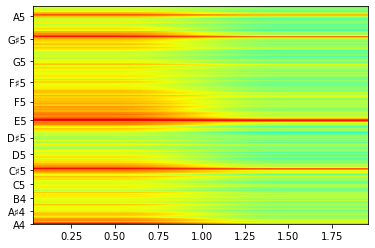

/home/makhmalbaf/Desktop/ML/Supervised-Learning/Major_Minor_Classification/Data/major/4_9.wav


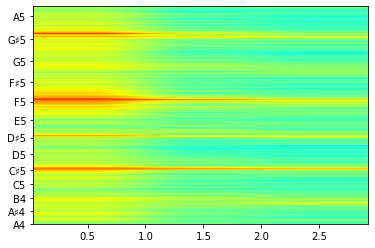

<Figure size 432x288 with 0 Axes>

In [112]:
for p in mfp:
    print(p)
    sig, sr = librosa.load(p, mono=True)
    sr_n = 2000
    sig = librosa.resample(sig, orig_sr=sr, target_sr = sr_n)
    plt.specgram(sig, NFFT=int(4096/2), noverlap=120, Fs=sr_n, cmap = "jet")
    plt.ylim(scale[0], 900)
    plt.yticks(scale,notes)
    plt.show()
    plt.clf()

/home/makhmalbaf/Desktop/ML/Supervised-Learning/Major_Minor_Classification/Data/major/5_5.wav


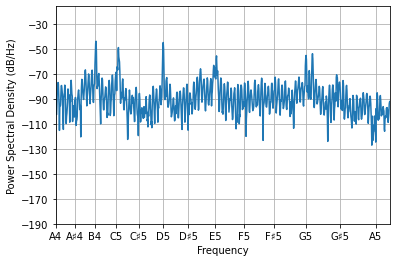

/home/makhmalbaf/Desktop/ML/Supervised-Learning/Major_Minor_Classification/Data/major/9_5.wav


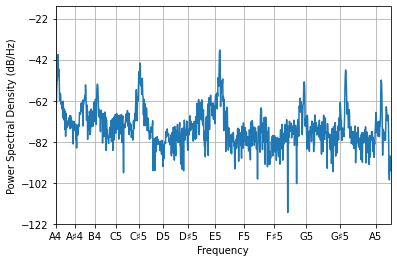

<Figure size 432x288 with 0 Axes>

In [57]:

for p in mfp:
    print(p)
    sig, sr = librosa.load(p, mono=True)
    sr_n = 2000
    sig = librosa.resample(sig, orig_sr=sr, target_sr = sr_n)
    
    plt.psd(sig, NFFT=int(4096), noverlap=120,Fs=sr_n)
    plt.xlim(scale[0], 900)
    plt.xticks(scale,notes)
    plt.show()
    plt.clf()